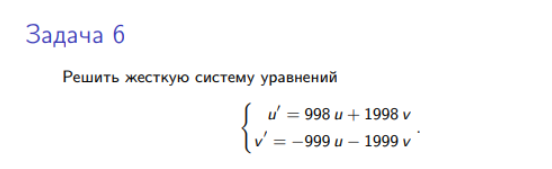

Адамс 3-й степени

**Определение: Система линейных уравнений Au` = f является жесткой, если велико отношение максимального и минимального модуля собственных значений**

$$s = \frac{maxRe(\lambda _k)}{minRe(\lambda _k)}$$

Собственные числа матрицы системы равны lam1 = −1,lam2 = −1000,откуда число жёсткости равно lam2/lam1= 10^3 ≫ 1 и,следовательно,система является жёсткой

In [34]:
import numpy as np
from math import exp
import plotly.graph_objects as go
import tqdm
import plotly.express as px
import matplotlib.pyplot as plt
import tqdm

In [35]:
def f(u,v):
    return 998*u + 1998*v
def g(u,v):
    return -999*u + (-1999)*v

# Аналитическое решение
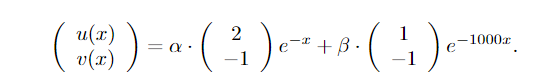

In [36]:
def analytiс(x):
    alpha = 1
    betta = 1
    U = []
    V = []
    for i in range(len(x)):
        u = alpha * 2 * np.exp(-x[i]) + betta * np.exp(-1000*x[i])
        v = -alpha * np.exp(-x[i]) - betta * np.exp(-1000*x[i])
        U.append(u)
        V.append(v)
    return U,V

In [37]:
A, B = analytiс(np.linspace(1, 4, 10000))

# Явная
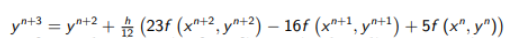

In [6]:
def adams3_1(U,V,a,b,n): 
    Y = np.zeros((n, 2))
    
    Y[0][0] = U[0]
    Y[0][1] = V[0]
    Y[1][0] = U[1]
    Y[1][1] = V[1]
    Y[2][0] = U[2]
    Y[2][1] = V[2]
    
    x = np.linspace(1, 4,n)
    h = x[1]-x[0]
    
    for i in range(3,len(x)):
        Y[i][0] = Y[i-1][0] + (h/12)*(23* f(Y[i-1][0],Y[i-1][1]) - 16*f(Y[i-2][0],Y[i-2][1]) + 5*f(Y[i-3][0],Y[i-3][1]))
        Y[i][1] = Y[i-1][1] + (h/12)*(23* g(Y[i-1][0],Y[i-1][1]) - 16*g(Y[i-2][0],Y[i-2][1]) + 5*g(Y[i-3][0],Y[i-3][1]))
    osh = max(max(abs(np.array(Y.T[0]) - np.array(U))), max(abs(np.array(Y.T[1]) - np.array(V)))) 
    return Y, osh        

In [38]:
A, B = analytiс(np.linspace(1, 4, 10000))
Y1, osh = adams3_1(A,B,1,4,10000) 

In [39]:
osh

2.715216940174514e-12

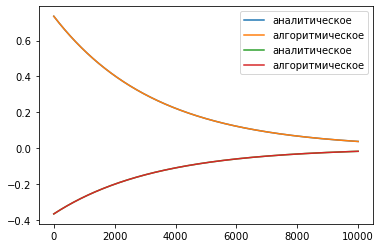

In [40]:
plt.plot(A, label=f'аналитическое')
plt.plot(Y1.T[0], label=f'алгоритмическое')
plt.plot(B, label=f'аналитическое')
plt.plot(Y1.T[1], label=f'алгоритмическое')
plt.legend()

# Неявная
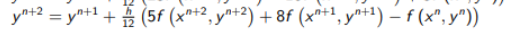

### 2) адаптивный шаг

In [68]:
def adams3_1_perem(a,b,n,eps): 
    Y = [[],[]]
    U,V = analytiс(np.linspace(a, b, n))
    x = np.linspace(a,b,n)
    
    Y[0].append(U[0])
    Y[1].append(V[0])
    Y[0].append(U[1])
    Y[1].append(V[1])
    Y[0].append(U[2])
    Y[1].append(V[2])
    
    i = 3
    x = list(x[:i])
    h = x[1]-x[0]

    while((x[-1]<=b)):
        Y00=Y[0][i-1] + (h/6)*(23* f(Y[0][i-1],Y[1][i-1]) - 16*f(Y[0][i-2],Y[1][i-2]) + 5*f(Y[0][i-3],Y[1][i-3]))
        Y01=Y[1][i-1] + (h/6)*(23* g(Y[0][i-1],Y[1][i-1]) - 16*g(Y[0][i-2],Y[1][i-2]) + 5*g(Y[0][i-3],Y[1][i-3]))
        Y10=Y[0][i-1] + (h/12)*(23* f(Y[0][i-1],Y[1][i-1]) - 16*f(Y[0][i-2],Y[1][i-2]) + 5*f(Y[0][i-3],Y[1][i-3]))
        Y11=Y[1][i-1] + (h/12)*(23* g(Y[0][i-1],Y[1][i-1]) - 16*g(Y[0][i-2],Y[1][i-2]) + 5*g(Y[0][i-3],Y[1][i-3]))

        Y10=Y10 + (h/12)*(23* f(Y10,Y11) - 16*f(Y[0][i-1],Y[1][i-1]) + 5*f(Y[0][i-2],Y[1][i-2]))
        Y11=Y11 + (h/12)*(23* g(Y10,Y11) - 16*g(Y[0][i-1],Y[1][i-1]) + 5*g(Y[0][i-2],Y[1][i-2]))
        if(h<=0.0001):
            h=h*2
        else:
            if(Y00-Y10>=eps*15):
                h=h/2
        x.append(x[i-1]+h)
        Y[0].append(Y[0][i-1] + (h/12)*(23* f(Y[0][i-1],Y[1][i-1]) - 16*f(Y[0][i-2],Y[1][i-2]) + 5*f(Y[0][i-3],Y[1][i-3])))
        Y[1].append(Y[1][i-1] + (h/12)*(23* g(Y[0][i-1],Y[1][i-1]) - 16*g(Y[0][i-2],Y[1][i-2]) + 5*g(Y[0][i-3],Y[1][i-3])))
        i=i+1
    U,V = analytiс(x)

    osh = max(max(abs(np.array(Y[0]) -np.array(U))),max(abs(np.array(Y[1])-np.array(V))))   
    return Y,x ,i-1,U,V, osh

In [69]:
Y2, x2, i,A,B, osh2 = adams3_1_perem(1,4,10000,osh)

In [70]:
osh2

2.7391977575064175e-12

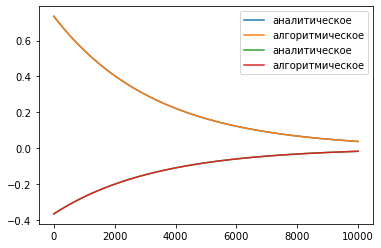

In [71]:
plt.plot(A, label=f'аналитическое')
plt.plot(Y2[0], label=f'алгоритмическое')
plt.plot(B, label=f'аналитическое')
plt.plot(Y2[1], label=f'алгоритмическое')
plt.legend()

# Что надо было исправить?
### 1) изменить while в адаптивном шаге (не по кол-ву шагов смотреть, а выполнять до тех пор, пока не перейдет b) (сделано выше)

### 2) изменить решение в неявной (вместо linalg считать ручками)

In [56]:
def adams3_2_2(U,V,a,b,n): 
    Y = np.zeros((n, 2))
    Q_q = np.zeros((2, 2))
    Y[0][0] = U[0]
    Y[0][1] = V[0]
    Y[1][0] = U[1]
    Y[1][1] = V[1]
    
    x = np.linspace(1, 4, n)
    h = x[1]-x[0]
    
    for i in range(1,len(x)-1):
        Q = np.array([[1-(h*5*998)/12, -(h*5*1998)/12], [(h*5*999)/12,  1+(h*5*1999)/12]])
        W = np.array([Y[i][0] + h/12*(8*f(Y[i][0], Y[i][1]) - f(Y[i-1][0], Y[i-1][1])), Y[i][1] + h/12*(8*g(Y[i][0], Y[i][1]) - g(Y[i-1][0], Y[i-1][1]))])

        det_Q = abs(Q[0][0]*Q[1][1] - Q[1][0]*Q[0][1])
        Q_q[0][0] = Q[1][1]
        Q_q[0][1] = -Q[1][0]
        Q_q[1][0] = -Q[0][1]
        Q_q[1][1] = Q[0][0]
        Q_ = Q_q.T/det_Q 
        X = Q_.dot(W)
        Y[i+1][0] = X[0]
        Y[i+1][1] = X[1]
#         print(X)
    return Y   

In [57]:
A, B = analytiс(np.linspace(1, 4, 10000))

In [58]:
Y2 = adams3_2_2(A,B,1,4,10000)

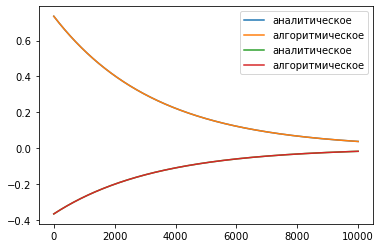

In [59]:
plt.plot(A, label=f'аналитическое')
plt.plot(Y2.T[0], label=f'алгоритмическое')
plt.plot(B, label=f'аналитическое')
plt.plot(Y2.T[1], label=f'алгоритмическое')
plt.legend()

### 3) показать преимущество адаптивного шага.

Зафиксировала шаг. Ошибка для адаптивного шага вышла меньше.

In [72]:
A, B = analytiс(np.linspace(1, 5, 10000))

In [73]:
Y1, osh = adams3_1(A,B,1,5,10000) 

In [74]:
osh

0.07753750834275111

In [75]:
Y2, x2, i,A,B, osh2 = adams3_1_perem(1,5,10000,osh)

In [76]:
osh2

6.4984129188871975e-12

### 4)поправить порядок

In [50]:
def mistake_1(analytiс,a,b,n):
    A, B = analytiс(np.linspace(a, b, n))
    X, osh = adams3_1(A,B,a,b,n)
    return np.max(np.abs(X.T[0] - A))

In [51]:
def p_1(a,b):
    
    ns = [2**i for i in range(13,16)]
    arr = []
    miss=np.zeros(len(ns))
    for i in range(len(ns)):
        miss[i]=mistake_1(analytiс,a,b,ns[i])
    plt.semilogy(np.log2(ns), miss)
#     print(np.log2(np.array(miss[:8]/miss[1:])))
    for i in range(1,3):
        print(np.log2(miss[i]/miss[i-1]))

-3.147782599319061
-3.062409909522369


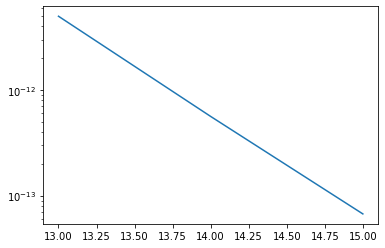

In [52]:
p_1(1,4)

In [60]:
def mistake_2(analytiс,a,b,n):
    A, B = analytiс(np.linspace(a, b, n))
    X = adams3_2_2(A,B,a,b,n)
    return np.max(np.abs(X.T[0] - A))

In [61]:
def p_2(a,b):
    ns = [2**i for i in range(9, 14)]
    miss=[]
    for i in range(len(ns)):
        miss.append(mistake_2(analytiс,a,b,ns[i]))
    plt.semilogy(np.log2(ns), miss)
    for i in range(1, 4):
        print(np.log2(miss[i] / miss[i-1]))
        

-3.0015707642800686
-3.0019932912299905
-2.9803487773834823


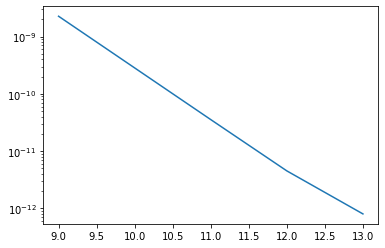

In [62]:
p_2(1,4)